In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline

In [6]:
dir='/work/teletravaille/UV_0.01/'
file_1='global_mean.cdf'
#file_2='global_std.cdf'
#file_3='local_mean.cdf'
#file_4='local_std.cdf'
#file_5='mean.cdf'
#file_6='std.cdf'
#file_7='local_truth.cdf'
#file_8='global_truth.cdf'
#file_9='vct0050.cdf'

In [7]:
global_mean=xr.open_dataset(dir+file_1)
#global_std=xr.open_dataset(dir+file_2)
#local_mean=xr.open_dataset(dir+file_3)
#local_std=xr.open_dataset(dir+file_4)
#mean=xr.open_dataset(dir+file_5)
#std=xr.open_dataset(dir+file_6)
#local_diff=xr.open_dataset(dir+file_7)
#global_diff=xr.open_dataset(dir+file_8)
#truth=xr.open_dataset(dir+file_9)

In [8]:
lat=global_mean.latxy
lon=global_mean.lonxy

In [9]:
SSH_global_mean=global_mean.SSH
SST_global_mean=global_mean.SST
SSS_global_mean=global_mean.SSS

#SSH_global_std=global_std.SSH
#SST_global_std=global_std.SST
#SSS_global_std=global_std.SSS

#SSH_local_mean=local_mean.SSH
#SST_local_mean=local_mean.SST
#SSS_local_mean=local_mean.SSS

#SSH_local_std=local_std.SSH
#SST_local_std=local_std.SST
#SSS_local_std=local_std.SSS

#SSH_mean=mean.SSH
#SST_mean=mean.SST
#SSS_mean=mean.SSS

#SSH_std=std.SSH
#SST_std=std.SST
#SSS_std=std.SSS

#SSH_local_diff=local_diff.SSH
#SST_local_diff=local_diff.SST
#SSS_local_diff=local_diff.SSS

#SSH_global_diff=global_diff.SSH
#SST_global_diff=global_diff.SST
#SSS_global_diff=global_diff.SSS

#SSH_truth=truth.SSH
#SST_truth=truth.SST
#SSS_truth=truth.SSS

In [ ]:
SSH_global_mean=SSH_global_mean.squeeze()
SST_global_mean=SST_global_mean.squeeze()
SSS_global_mean=SSS_global_mean.squeeze()

SSH_global_std=SSH_global_std.squeeze()
SST_global_std=SST_global_std.squeeze()
SSS_global_std=SSS_global_std.squeeze()

SSH_local_mean=SSH_local_mean.squeeze()
SST_local_mean=SST_local_mean.squeeze()
SSS_local_mean=SSS_local_mean.squeeze()

SSH_local_std=SSH_local_std.squeeze()
SST_local_std=SST_local_std.squeeze()
SSS_local_std=SSS_local_std.squeeze()

SSH_mean=SSH_mean.squeeze()
SST_mean=SST_mean.squeeze()
SSS_mean=SSS_mean.squeeze()

SSH_std=SSH_std.squeeze()
SST_std=SST_std.squeeze()
SSS_std=SSS_std.squeeze()

SSH_local_diff=SSH_local_diff.squeeze()
SST_local_diff=SST_local_diff.squeeze()
SSS_local_diff=SSS_local_diff.squeeze()

SSH_global_diff=SSH_global_diff.squeeze()
SST_global_diff=SST_global_diff.squeeze()
SSS_global_diff=SSS_global_diff.squeeze()

SSH_truth=SSH_truth.squeeze()
SST_truth=SST_truth.squeeze()
SSS_truth=SSS_truth.squeeze()

## Plot Function

In [10]:
def cartopy_subplot(lon, lat, var, ax1, cmap, typevar, nlevels):
    
#Function to create cartopy subplot with contourf
#var = variable to plot (2D)


#ax1 = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree(central_longitude=-30)) #add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))\n",
#ax.set_extent([-100, 50, 0, 70])
cmap.set_under(color='grey')
#pcolor=ax1.contourf(lon,lat,var, levels=levels, transform=ccrs.PlateCarree(),cmap=cmap)#,vmin=vmin,vmax=vmax)
ax1.add_feature(cfeature.LAND,facecolor='grey')
ax1.coastlines(resolution='50m')
gl=ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
#gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
#gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
pp = ax1.contourf(lon,lat,var, levels=nlevels, transform=ccrs.PlateCarree(),cmap=cmap)#,vmin=vmin,vmax=vmax)

#gl.xlabels_top = False
#gl.ylabels_left = False
if typevar == 'SSH':
cbar_num_format = "%0.3f"
    else:
    cbar_num_format = "%0.2f"
    
cbar = plt.colorbar(pp,orientation='horizontal',shrink=1, format=cbar_num_format)
#cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='m', format='%.0e')


return gl

IndentationError: expected an indented block (<ipython-input-10-7df1efde800e>, line 3)

NameError: name 'SSH_local_mean' is not defined

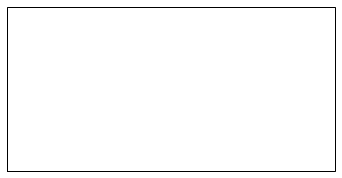

In [13]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131,projection=ccrs.PlateCarree(central_longitude=-30))

levels_SSH = np.linspace(-0.45, -0.07, 25)
levels_SST = np.linspace(10.1, 17.7, 25)
levels_SSS = np.linspace(32, 38.1, 25)

cmap = [plt.get_cmap('inferno'),plt.get_cmap('cool'), plt.get_cmap('winter')]
var = [SSH_mean, SST_local_mean,SSS_local_mean]
levels = [levels_SSH, levels_SST, levels_SSS]
figures = [131,132,133]

for ii in [0,1,2]:
   ax1 = fig.add_subplot(figures[ii],projection=ccrs.PlateCarree(central_longitude=-30))
   pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap[ii])
   cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1)#, format=cbar_num_format)

plt.suptitle('Local Mean' ,size=19)
plt.show(fig)

NameError: name 'SSH_local_diff' is not defined

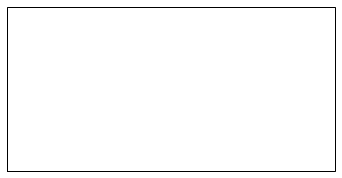

In [16]:
fig = plt.figure(figsize=(20,6))

levels_SSH = np.linspace(-0.045, 0.066, 25)
levels_SST = np.linspace(-0.33, 0.47, 25)
levels_SSS = np.linspace(-0.18, 0.33, 25)
 
    
ax1 = fig.add_subplot(131,projection=ccrs.PlateCarree(central_longitude=-30))
var = SSH_local_diff
cmap = plt.get_cmap('inferno')
cartopy_subplot(lon, lat, var, ax1, cmap,'SSH', levels_SSH)
ax1.set_title('SSH',size=17,y=1.08)
    
ax2 = fig.add_subplot(132,projection=ccrs.PlateCarree(central_longitude=-30))
var = SST_local_diff
cmap_2 = plt.get_cmap('cool')
gl = cartopy_subplot(lon, lat, var, ax2, cmap_2,'notSSH', levels_SST)
ax2.set_title('SST',size=17,y=1.08)
gl.ylabels_left = False
    
ax3 = fig.add_subplot(133,projection=ccrs.PlateCarree(central_longitude=-30))
var = SSS_local_diff
cmap_3 = plt.get_cmap('winter')
gl = cartopy_subplot(lon, lat, var, ax3, cmap_3)
cartopy_subplot(lon, lat, var, ax3, cmap_3,'notSSH', levels_SSS)
ax3.set_title('SSS',size=17,y=1.08)
    
    
plt.suptitle('Difference between Local analysis and Truth state' ,size=19)
#plt.savefig(\"local_diff_new.png\")